In [1]:
import os
from os.path import join as pj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
# Statistics
from evaluation.classification.statistics import get_precisions, get_size_list_from_xte
# Visualize
from evaluation.classification.visualize import plot_df_distrib_size

%matplotlib inline
plt.style.use("ggplot")

### --- compare precision with population ---

In [2]:
resnet50_All = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/resnet50/b20_lr1e-5/crossvalid_20200806_All_uniform30_dropout_oversample/validation_matrix.csv')
resnet50_All1to2 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/resnet50/b20_lr1e-5/crossvalid_20200806_All1to2_uniform30_dropout_oversample/validation_matrix.csv')
resnet50_All2to3 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/resnet50/b20_lr1e-5/crossvalid_20200806_All2to3_uniform30_dropout_oversample/validation_matrix.csv')
resnet50_All3to4 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/resnet50/b20_lr1e-5/crossvalid_20200806_All3to4_uniform30_dropout_oversample/validation_matrix.csv')
resnet50_All4to5 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/resnet50/b20_lr1e-5/crossvalid_20200806_All4to5_uniform30_dropout_oversample/validation_matrix.csv')
resnet50_All5to6 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/resnet50/b20_lr1e-5/crossvalid_20200806_All5to6_uniform30_dropout_oversample/validation_matrix.csv')

In [3]:
resnet50_All_precisions = get_precisions(resnet50_All)
resnet50_All1to2_precisions = get_precisions(resnet50_All1to2)
resnet50_All2to3_precisions = get_precisions(resnet50_All2to3)
resnet50_All3to4_precisions = get_precisions(resnet50_All3to4)
resnet50_All4to5_precisions = get_precisions(resnet50_All4to5)
resnet50_All5to6_precisions = get_precisions(resnet50_All5to6)

In [4]:
exp_name = ["resnet50_All", 
            "resnet50_All1to2", 
            "resnet50_All2to3", 
            "resnet50_All3to4", 
            "resnet50_All4to5", 
            "resnet50_All5to6",]
exp_ap = [resnet50_All_precisions.mean(), 
          resnet50_All1to2_precisions.mean(), 
          resnet50_All2to3_precisions.mean(), 
          resnet50_All3to4_precisions.mean(), 
          resnet50_All4to5_precisions.mean(), 
          resnet50_All5to6_precisions.mean(),]

In [5]:
df = pd.DataFrame({"exp_ap": exp_ap})
df.index = exp_name
df

,exp_ap
resnet50_All,0.886176
resnet50_All1to2,0.890371
resnet50_All2to3,0.897272
resnet50_All3to4,0.897008
resnet50_All4to5,0.901991
resnet50_All5to6,0.906653


In [6]:
insect_names = ['Diptera', 'Ephemeridae', 'Ephemeroptera', 'Lepidoptera', 'Plecoptera', 'Trichoptera']

In [7]:
df_per_label = pd.DataFrame({"resnet50_All": resnet50_All_precisions, 
                             "resnet50_All1to2": resnet50_All1to2_precisions, 
                             "resnet50_All2to3": resnet50_All2to3_precisions, 
                             "resnet50_All3to4": resnet50_All3to4_precisions, 
                             "resnet50_All4to5": resnet50_All4to5_precisions, 
                             "resnet50_All5to6": resnet50_All5to6_precisions,})
df_per_label.index = insect_names
df_per_label

,resnet50_All,resnet50_All1to2,resnet50_All2to3,resnet50_All3to4,resnet50_All4to5,resnet50_All5to6
Diptera,0.914851,0.910891,0.918812,0.924752,0.934653,0.932673
Ephemeridae,0.895105,0.916084,0.937063,0.888112,0.923077,0.965035
Ephemeroptera,0.795222,0.805461,0.815700,0.822526,0.836177,0.815700
Lepidoptera,0.950577,0.946458,0.948929,0.948929,0.943163,0.944811
Plecoptera,0.908722,0.910751,0.888438,0.910751,0.902637,0.916836
Trichoptera,0.852580,0.852580,0.874693,0.886978,0.872236,0.864865


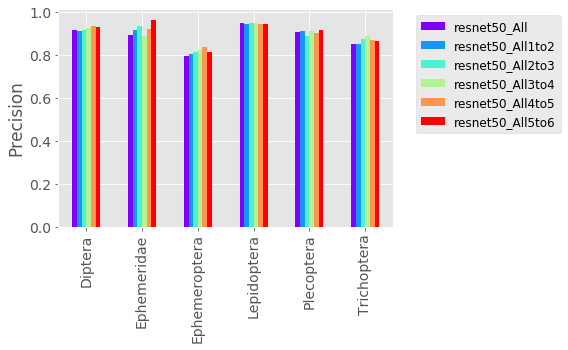

In [8]:
plt.rcParams["font.size"] = 14
df_per_label.plot(kind="bar", y=["resnet50_All", "resnet50_All1to2", "resnet50_All2to3", "resnet50_All3to4", "resnet50_All4to5", "resnet50_All5to6"], cmap="rainbow")
plt.ylabel("Precision")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_number_of_augmentation/compare_precision_resnet50.png", bbox_inches="tight")

### --- compare accuracy distribution of size ---

In [9]:
cls_each_size_df = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/resnet50/b20_lr1e-5/crossvalid_20200806_All_uniform30_dropout_oversample/each_size_df.csv')
cls_each_size_df["order"] = cls_each_size_df["Insect_size"].apply(lambda x: np.floor(np.log2(x)))
insect_size = np.asarray(cls_each_size_df["order"])
idx, count = np.unique(insect_size, return_counts=True)
insect_size_df = pd.DataFrame({"order": idx, "count": count})
insect_size_df = insect_size_df.drop(insect_size_df.index[[0, 1]])

In [10]:
resnet50_All = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/resnet50/b20_lr1e-5/crossvalid_20200806_All_uniform30_dropout_oversample/all_size_df.csv')
resnet50_All1to2 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/resnet50/b20_lr1e-5/crossvalid_20200806_All1to2_uniform30_dropout_oversample/all_size_df.csv')
resnet50_All2to3 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/resnet50/b20_lr1e-5/crossvalid_20200806_All2to3_uniform30_dropout_oversample/all_size_df.csv')
resnet50_All3to4 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/resnet50/b20_lr1e-5/crossvalid_20200806_All3to4_uniform30_dropout_oversample/all_size_df.csv')
resnet50_All4to5 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/resnet50/b20_lr1e-5/crossvalid_20200806_All4to5_uniform30_dropout_oversample/all_size_df.csv')
resnet50_All5to6 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/resnet50/b20_lr1e-5/crossvalid_20200806_All5to6_uniform30_dropout_oversample/all_size_df.csv')

In [11]:
resnet50_All = resnet50_All.drop(resnet50_All.index[[0, 1]])
resnet50_All1to2 = resnet50_All1to2.drop(resnet50_All1to2.index[[0, 1]])
resnet50_All2to3 = resnet50_All2to3.drop(resnet50_All2to3.index[[0, 1]])
resnet50_All3to4 = resnet50_All3to4.drop(resnet50_All3to4.index[[0, 1]])
resnet50_All4to5 = resnet50_All4to5.drop(resnet50_All4to5.index[[0, 1]])
resnet50_All5to6 = resnet50_All5to6.drop(resnet50_All5to6.index[[0, 1]])

In [12]:
insect_size_df["Insect_size"] = resnet50_All["Insect_size"]
insect_size_df

,order,count,Insect_size
2,7.0,12,205.833333
3,8.0,51,395.039216
4,9.0,131,776.328244
5,10.0,403,1572.317618
6,11.0,1004,2982.721116
7,12.0,740,5730.868919
8,13.0,431,11417.570766
9,14.0,260,23926.192308
10,15.0,21,35455.380952


In [13]:
all_df = pd.DataFrame()
all_df["order"] = insect_size_df["order"]
all_df["count"] = insect_size_df["count"]
all_df["resnet50_All"] = resnet50_All["Accuracy"]
all_df["resnet50_All1to2"] = resnet50_All1to2["Accuracy"]
all_df["resnet50_All2to3"] = resnet50_All2to3["Accuracy"]
all_df["resnet50_All3to4"] = resnet50_All3to4["Accuracy"]
all_df["resnet50_All4to5"] = resnet50_All4to5["Accuracy"]
all_df["resnet50_All5to6"] = resnet50_All5to6["Accuracy"]
all_df

,order,count,resnet50_All,resnet50_All1to2,resnet50_All2to3,resnet50_All3to4,resnet50_All4to5,resnet50_All5to6
2,7.0,12,1.000000,1.000000,0.916667,1.000000,0.916667,1.000000
3,8.0,51,0.862745,0.843137,0.843137,0.843137,0.843137,0.843137
4,9.0,131,0.793893,0.801527,0.809160,0.870229,0.839695,0.839695
5,10.0,403,0.836228,0.823821,0.833747,0.853598,0.856079,0.846154
6,11.0,1004,0.892430,0.895418,0.889442,0.901394,0.890438,0.899402
7,12.0,740,0.929730,0.936486,0.947297,0.931081,0.939189,0.936486
8,13.0,431,0.965197,0.955916,0.967517,0.967517,0.972158,0.979118
9,14.0,260,0.984615,0.984615,0.988462,0.973077,0.988462,0.984615
10,15.0,21,0.904762,0.952381,0.904762,0.952381,0.952381,0.904762


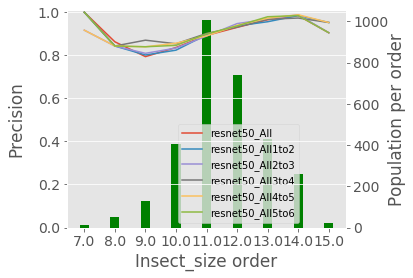

In [14]:
plt.rcParams["font.size"] = 14
fig, ax1 = plt.subplots(figsize=(5,4))
ax2 = ax1.twinx()

x_label = ["7.0", "8.0", "9.0", "10.0", "11.0", "12.0", "13.0", "14.0", "15.0"]

ax1.bar(x_label, all_df["count"], width=0.3, color="g")
ax2.plot(x_label, all_df["resnet50_All"], label="resnet50_All")
ax2.plot(x_label, all_df["resnet50_All1to2"], label="resnet50_All1to2")
ax2.plot(x_label, all_df["resnet50_All2to3"], label="resnet50_All2to3")
ax2.plot(x_label, all_df["resnet50_All3to4"], label="resnet50_All3to4")
ax2.plot(x_label, all_df["resnet50_All4to5"], label="resnet50_All4to5")
ax2.plot(x_label, all_df["resnet50_All5to6"], label="resnet50_All5to6")
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h2, l2, bbox_to_anchor=(0.85, 0.), loc='lower right', fontsize=10)

ax1.set_xlabel("Insect_size order")
ax1.set_ylabel("Precision")
ax1.yaxis.set_label_coords(-0.15, 0.5)
ax1.grid(False)
ax2.set_ylabel("Population per order")
ax2.set_ylim(0., 1.01)
ax2.yaxis.set_label_coords(1.15, 0.5)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_number_of_augmentation/compare_precision_distrib_of_size.png", bbox_inches="tight")